<a href="https://colab.research.google.com/github/wanyuL/ReinforcementRats2021/blob/master/RNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run rnn0 on fake data

In [1]:
%load_ext autoreload
%autoreload 2

# Colab:
# ! git clone https://github.com/wanyuL/ReinforcementRats2021.git 
# import sys 
# sys.path.append('./ReinforcementRats2021')

In [2]:
import nmastandard
from rnn0 import *
from gen_fake_data import *
from load_data import *
import pickle

In [3]:
device=nmastandard.set_device()  # select device



In [4]:
# prepare for training


# file = open("Cori_MOs.pkl",'rb')
# spk = pickle.load(file)

with open('test.pkl','rb') as f:
    spk = pickle.load(f)
    # print(x.shape)


NT=spk.shape[0]
ntrials=spk.shape[1]
NN=spk.shape[2]
ncomp=10

# fake_spk, fake_spk_rates, latents=gen_fake_spk(NT,ntrials,NN,ncomp)
#spk = fake_spk

trainingData = torch.from_numpy(spk[:, :ntrials*4//5, :]).to(device).float()
testData = torch.from_numpy(spk[:, ntrials*4//5:, :]).to(device).float()




In [5]:
trainingData.shape

torch.Size([250, 171, 113])

In [6]:
import rnnautoencoder as rnnae


In [7]:
#NN1 = trainingData.shape[-1]
#NN2 = testData.shape[-1]

# we initialize the neural network
# net = rnn0(ncomp, trainingData.shape[-1], trainingData.shape[-1], dropout=0.5 ,bidi = False).to(device)
net = rnnae.RNNAE(trainingData.shape[-1], 25, [100, 50], [75, 50])

# special thing:  we initialize the biases of the last layer in the neural network
# we set them as the mean firing rates of the neurons.
# this should make the initial predictions close to the mean, because the latents don't contribute much
# net.fc.bias.data[:] = trainingData.mean((0,1))


Random seed 2021 has been set.
Naive 0 Guess Accuracy: 0.9827569723129272


MSE Train @ 0: Loss — 0.01823578029870987, Acc — 0.8468686938285828
	Val @ 0: Loss — 0.022060152143239975, Acc — 0.8493171334266663
MSE Train @ 10: Loss — 0.011041557416319847, Acc — 0.9806346893310547
	Val @ 10: Loss — 0.01482328213751316, Acc — 0.979269802570343
MSE Train @ 20: Loss — 0.0047273715026676655, Acc — 0.9938005208969116
	Val @ 20: Loss — 0.008985060267150402, Acc — 0.9938563704490662
MSE Train @ 30: Loss — 0.0040048956871032715, Acc — 0.9959856867790222
	Val @ 30: Loss — 0.008239728398621082, Acc — 0.9960386753082275
MSE Train @ 40: Loss — 0.003652866231277585, Acc — 0.9972822070121765
	Val @ 40: Loss — 0.007943572476506233, Acc — 0.9971607327461243



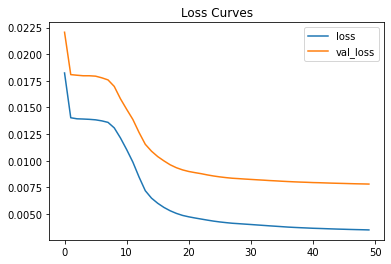

In [8]:
# train the rnn!

import nmastandard as nmas
SEED = 2021
nmas.set_seed(seed=SEED)
DEVICE = nmas.set_device()

print(f'Naive 0 Guess Accuracy: {1-(testData > 0).float().mean()}')

loss, val_loss = rnnae.train_autoencoder(net, trainingData, DEVICE, val_dataset=testData, epochs=50, batch_size=20, seed=0)
# might not expect the model to generalize well, as the adjacency matrices might 
# differ between different neuron subpopulations

plt.figure()
plt.title('Loss Curves')
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

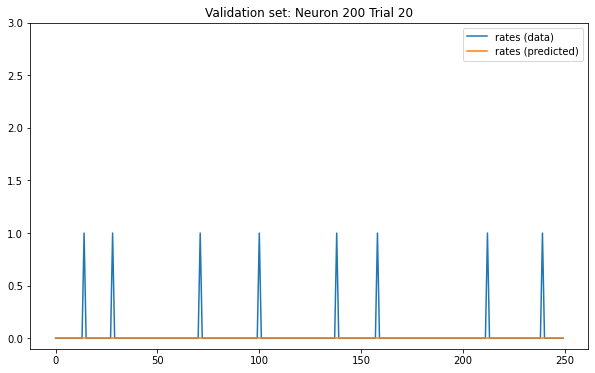

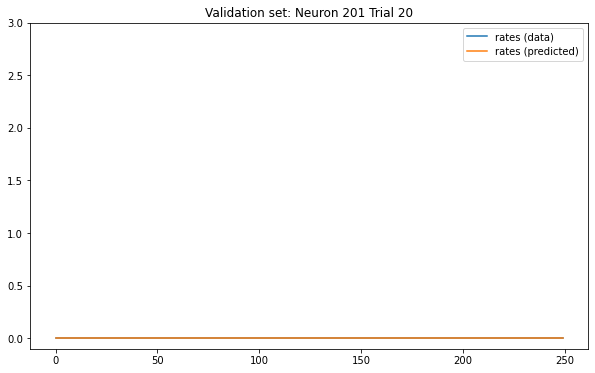

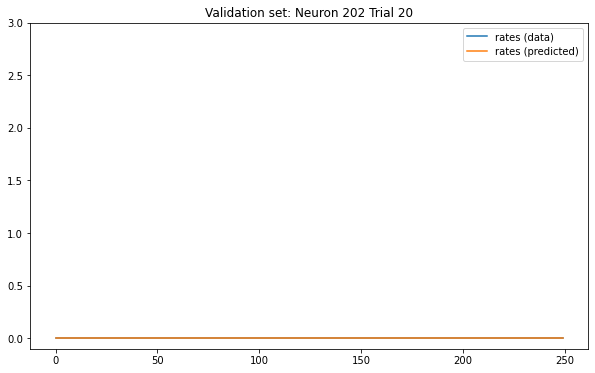

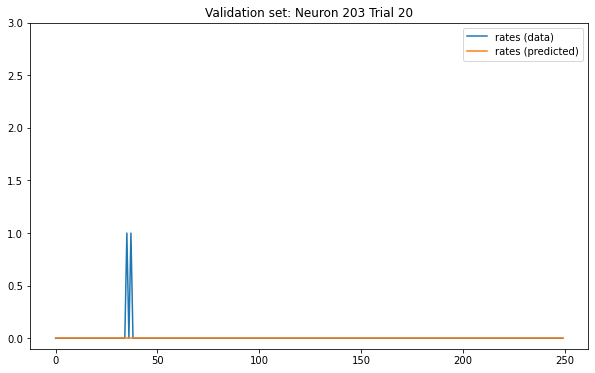

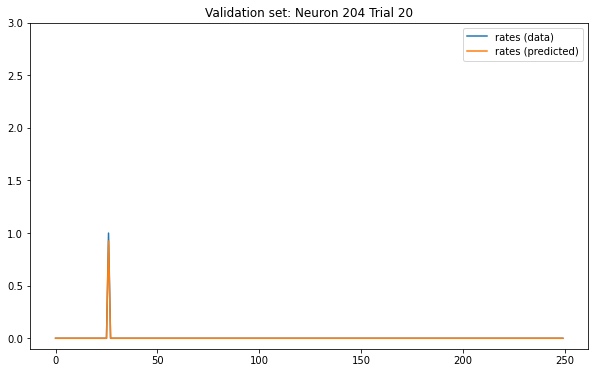

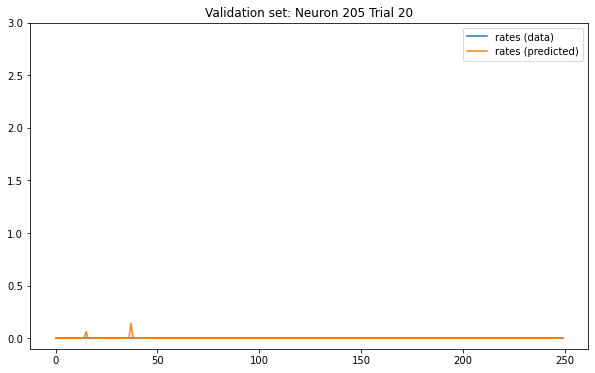

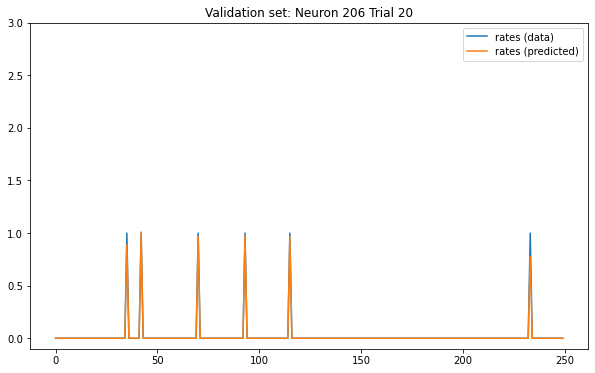

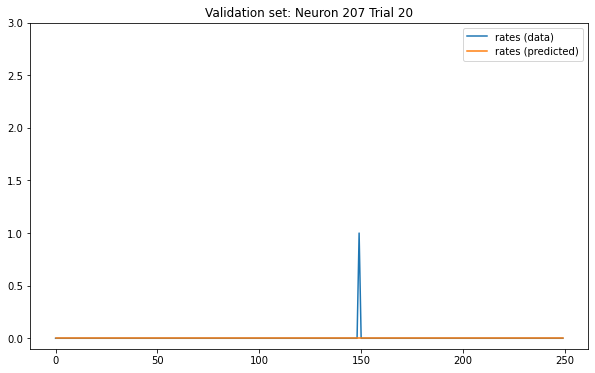

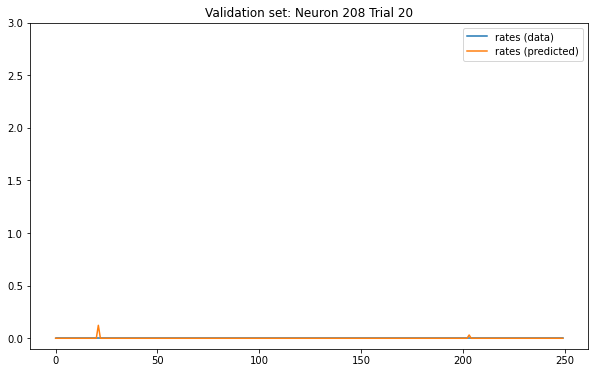

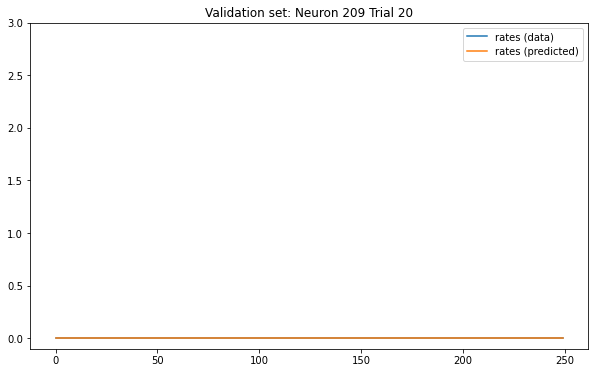

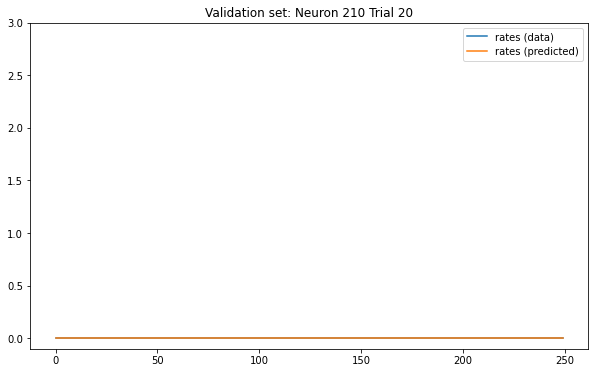

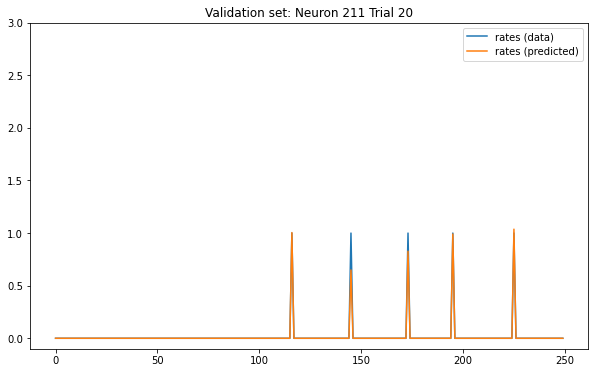

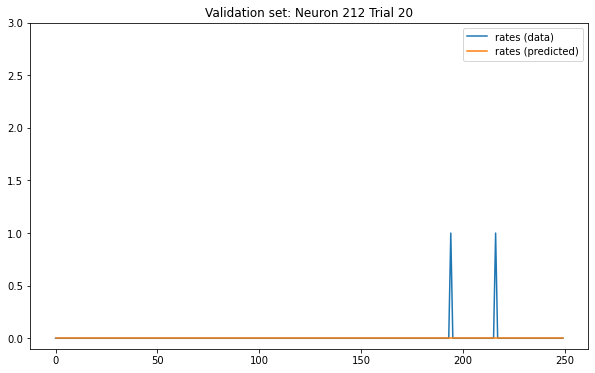

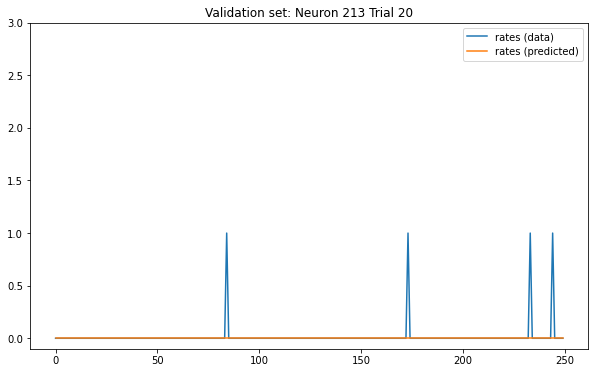

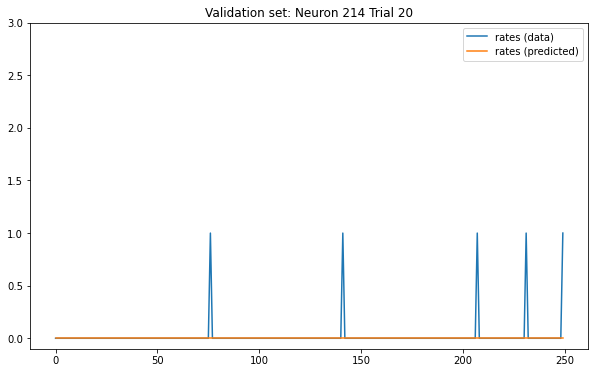

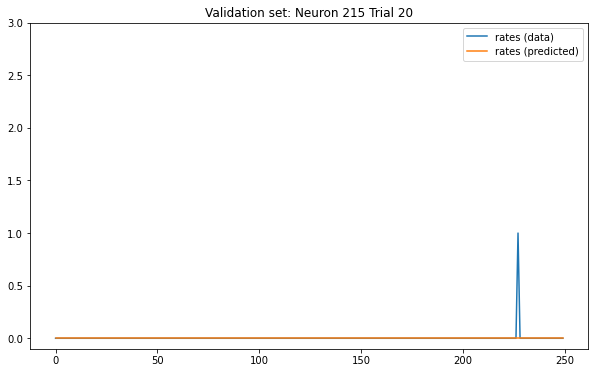

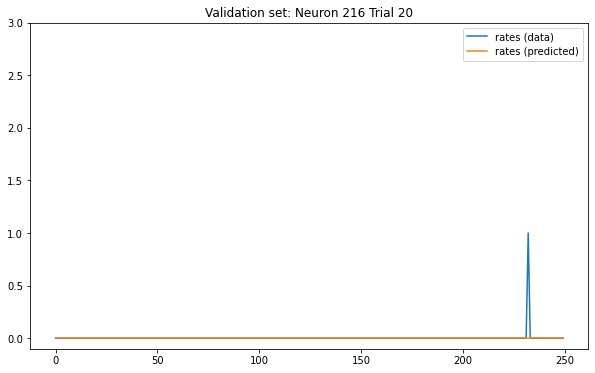

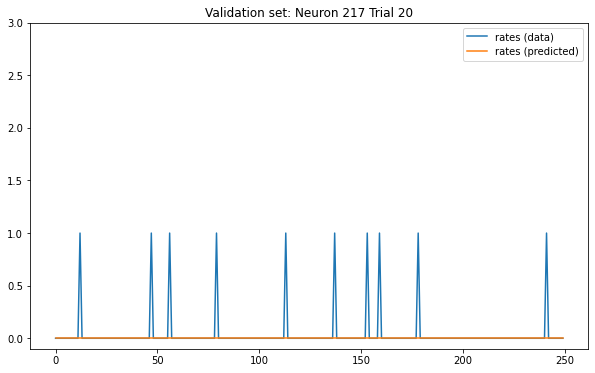

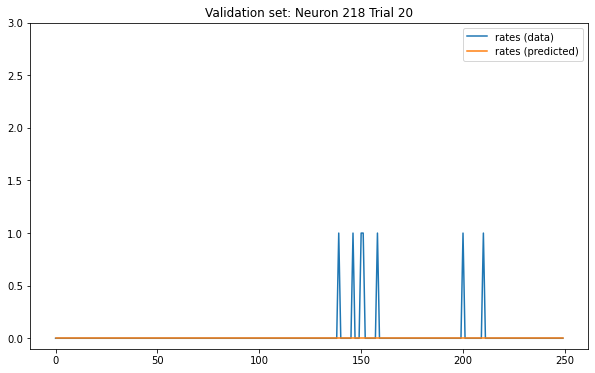

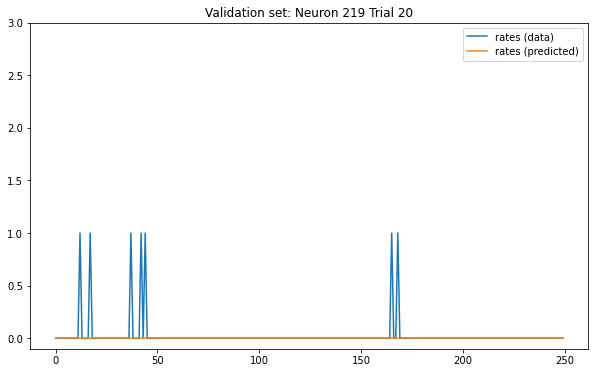

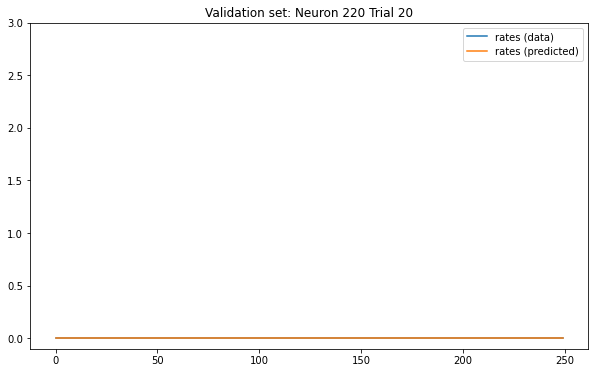

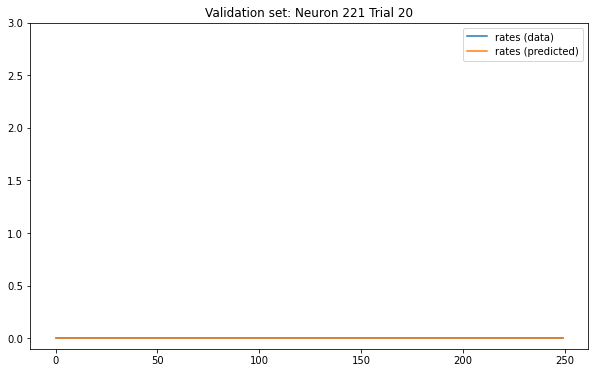

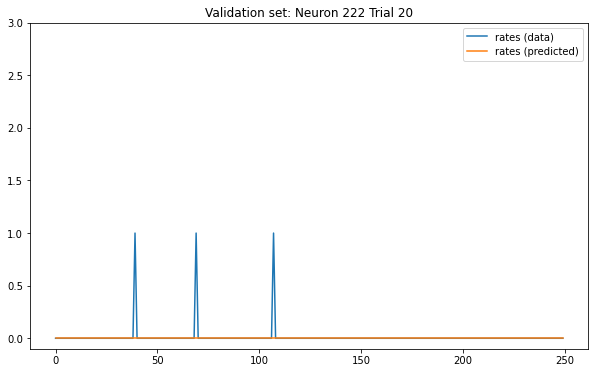

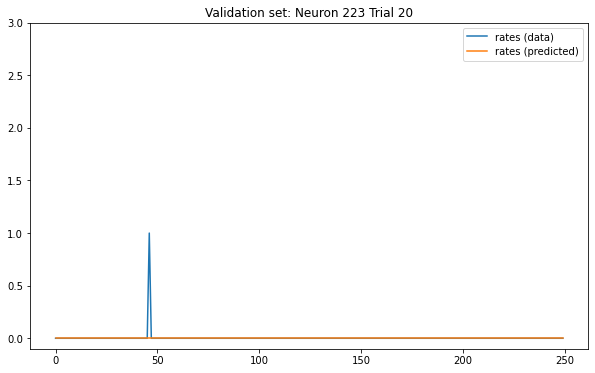

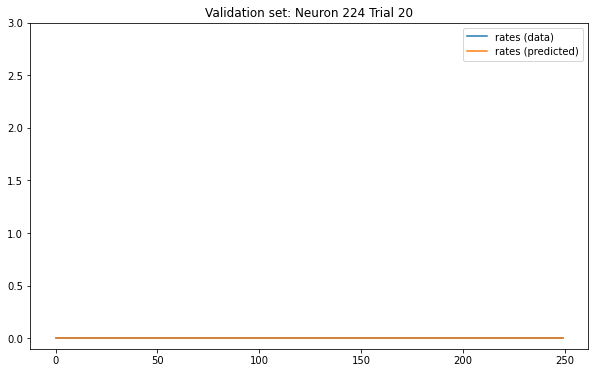

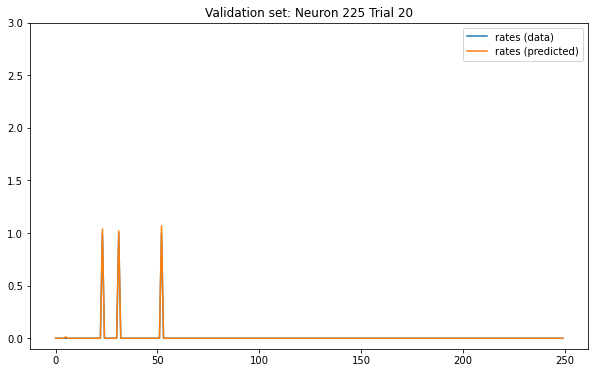

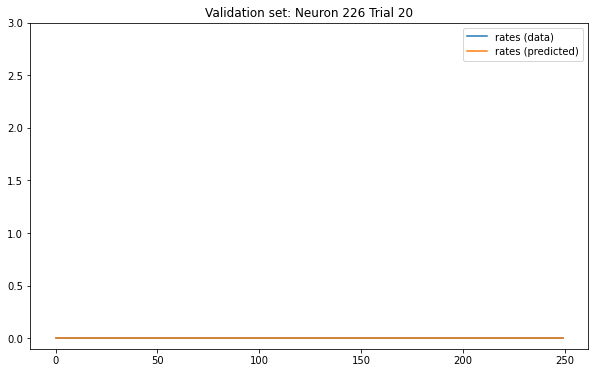

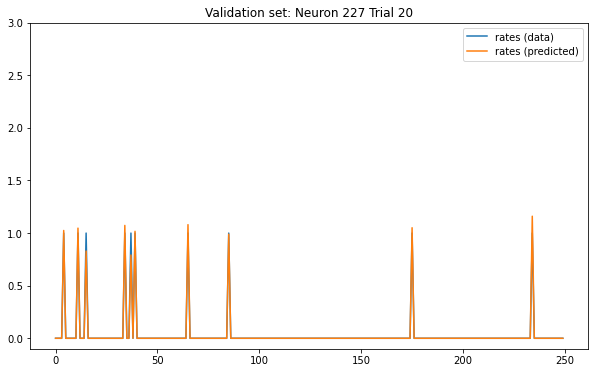

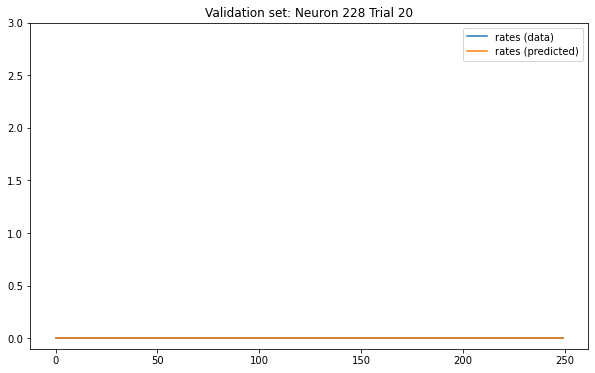

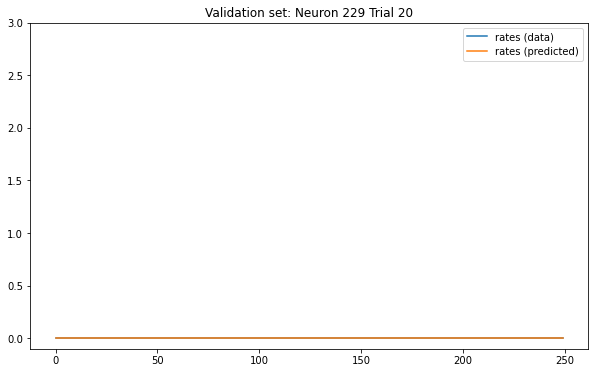

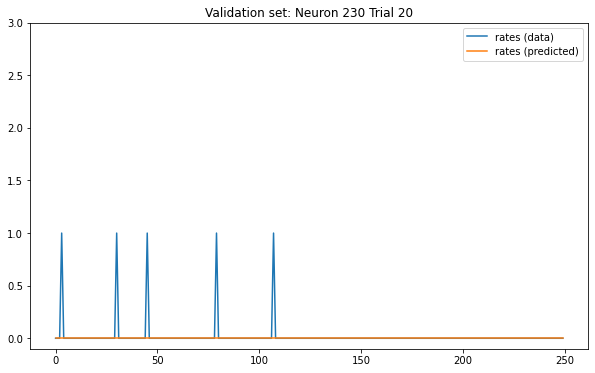

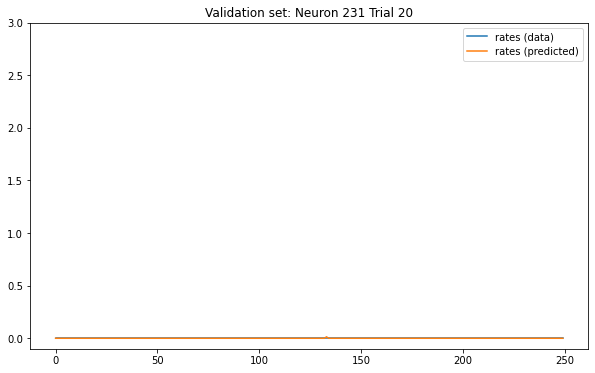

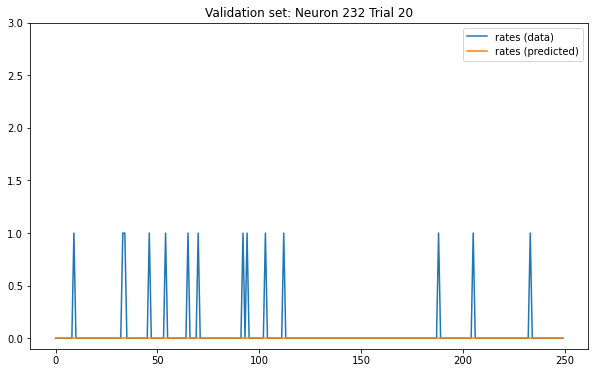

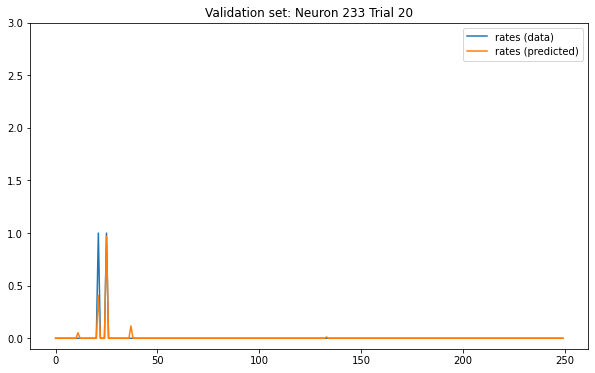

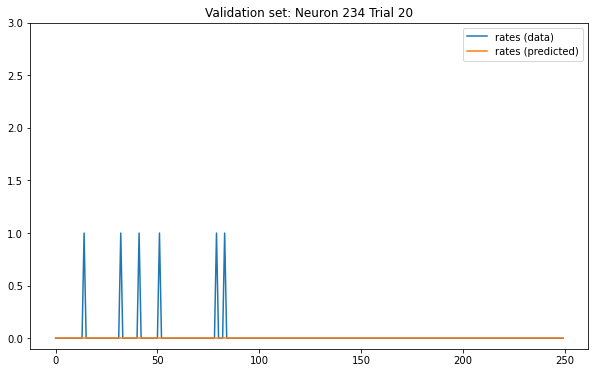

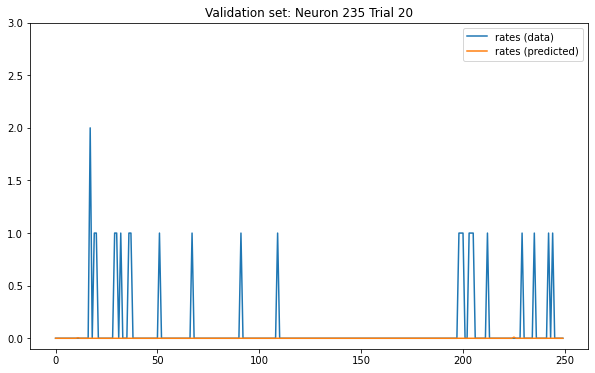

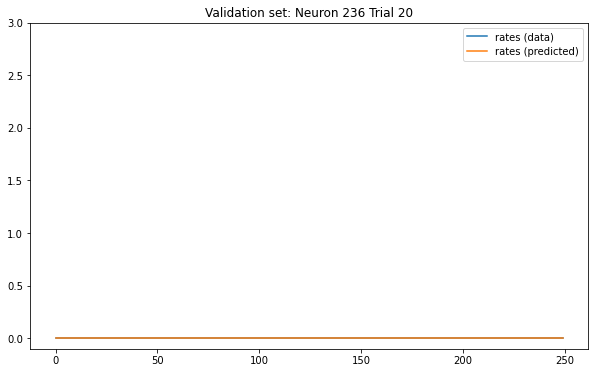

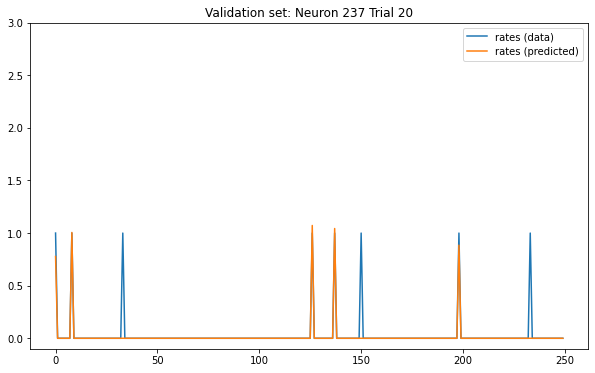

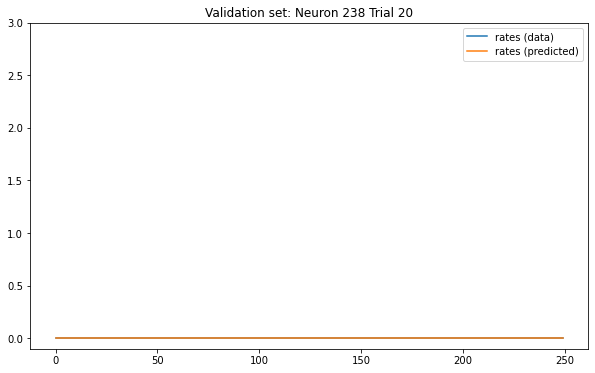

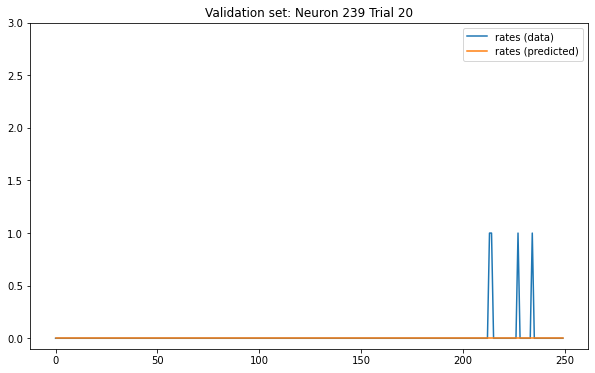

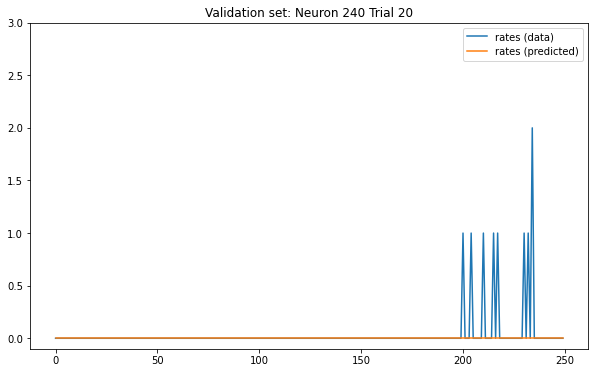

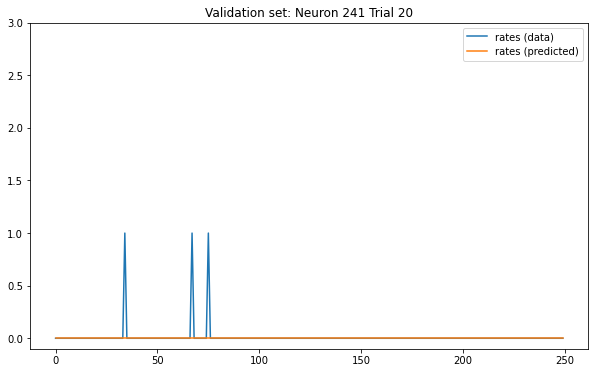

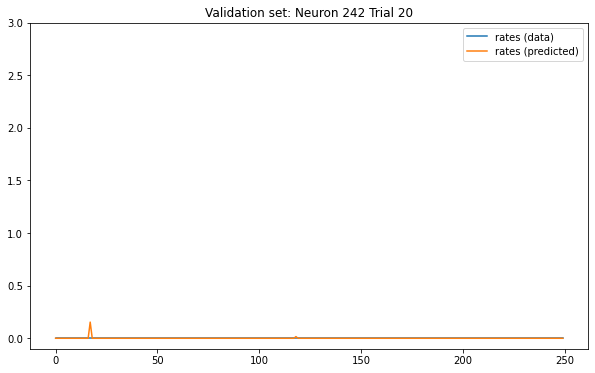

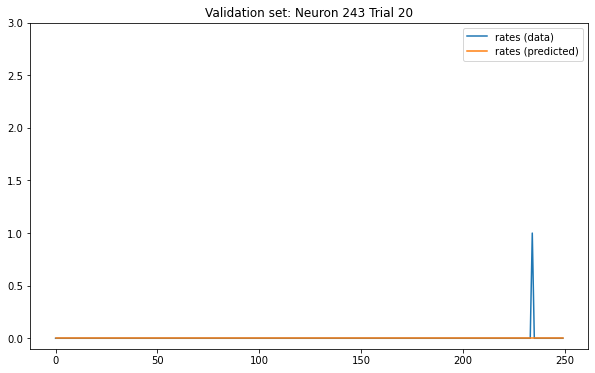

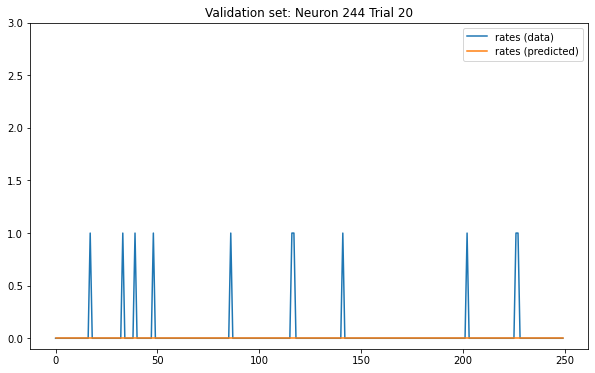

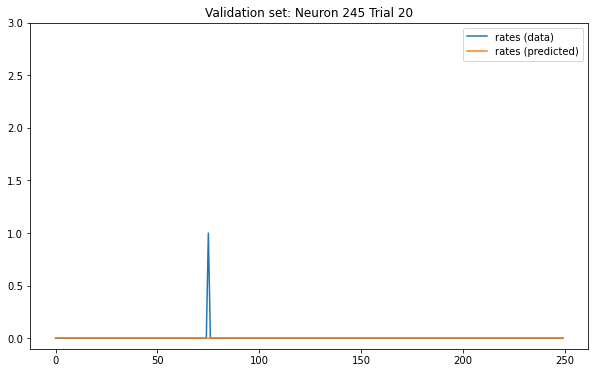

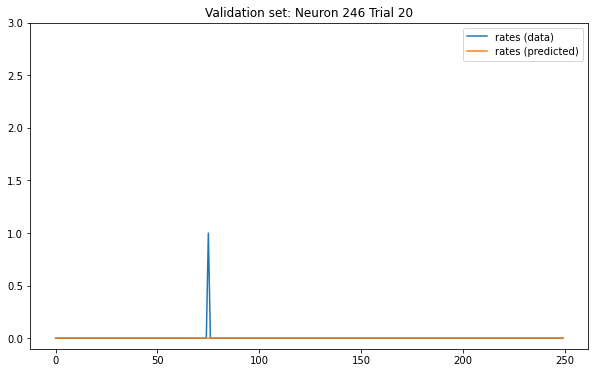

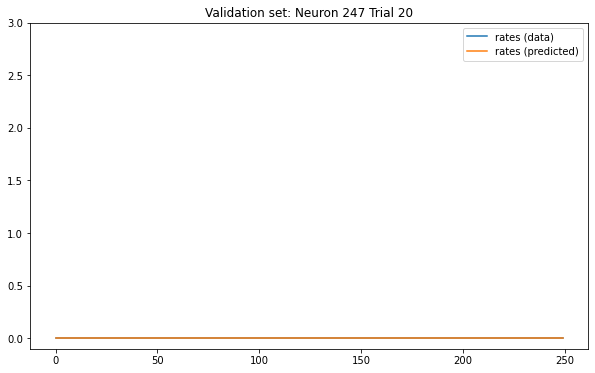

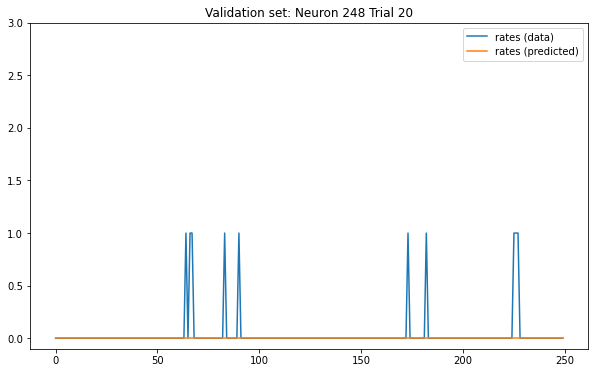

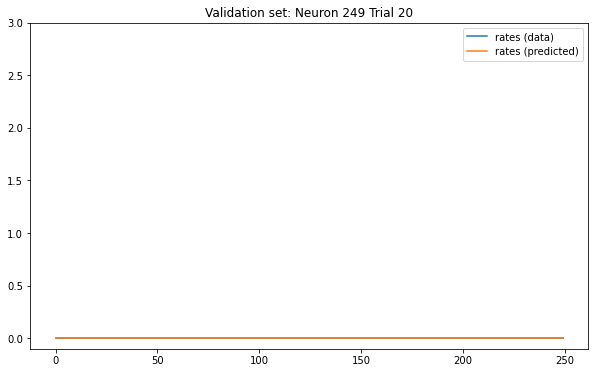

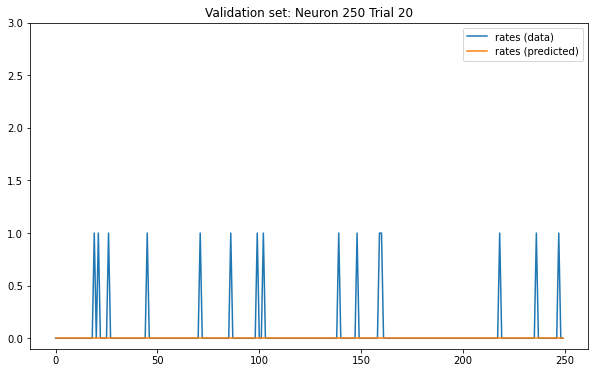

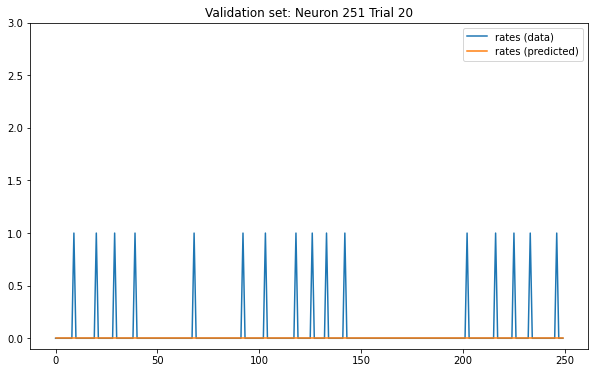

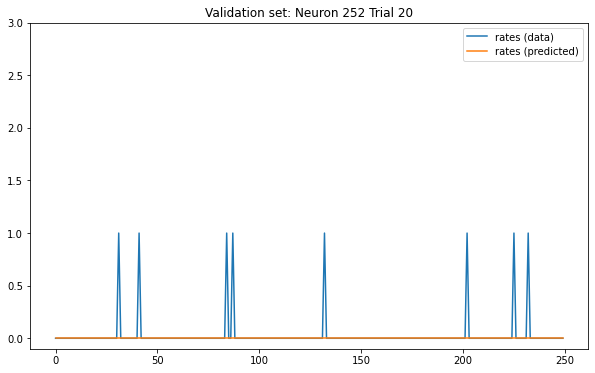

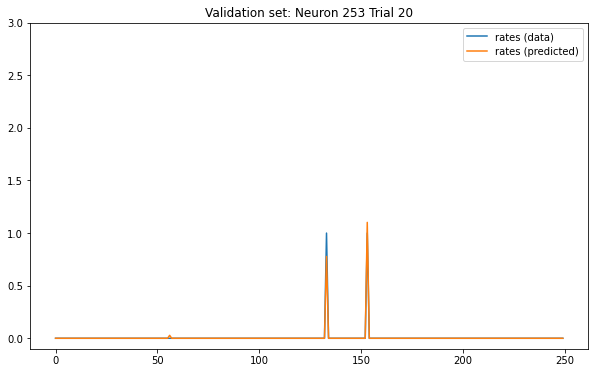

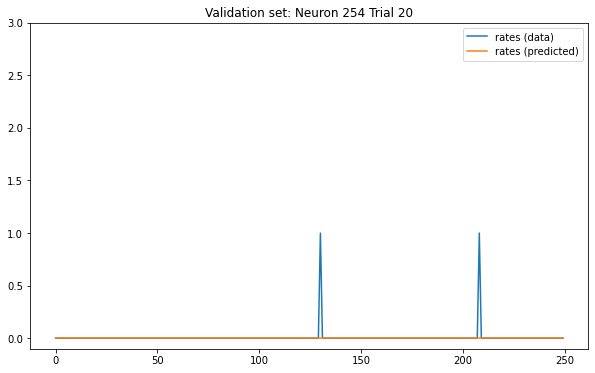

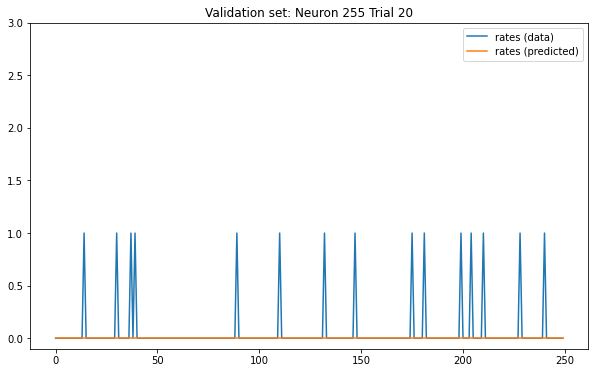

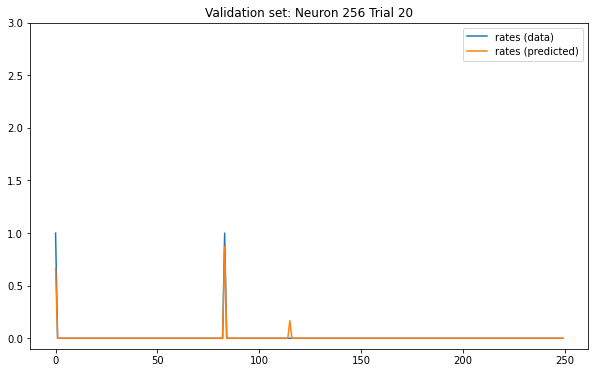

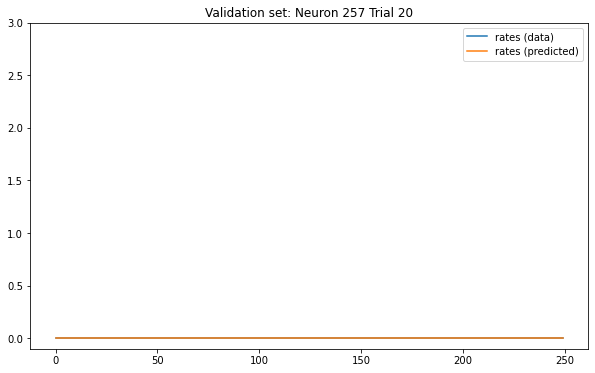

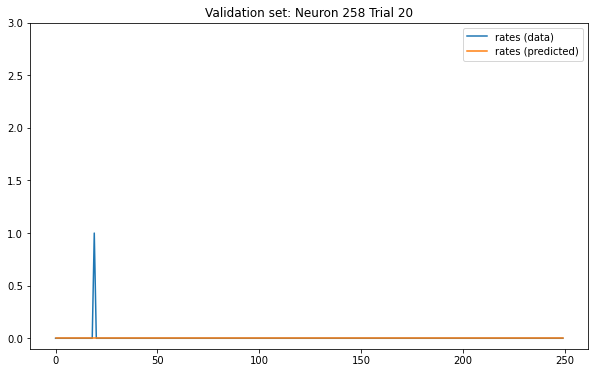

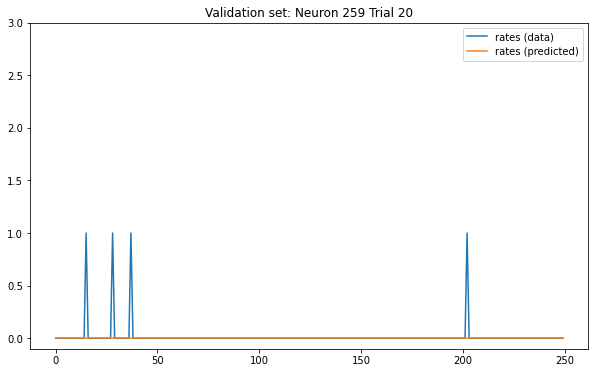

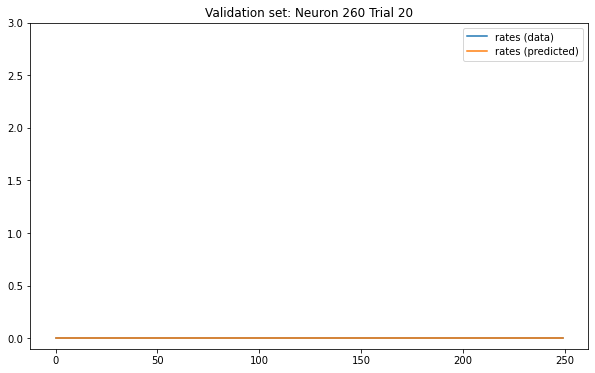

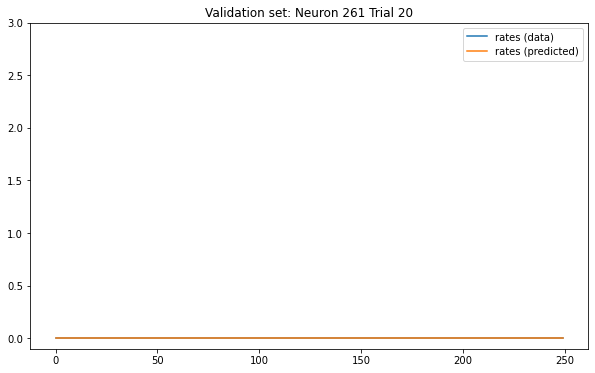

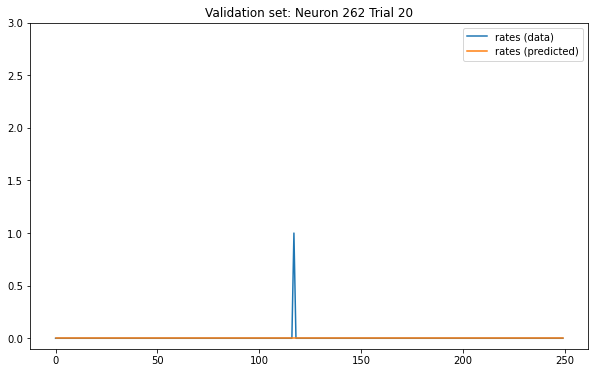

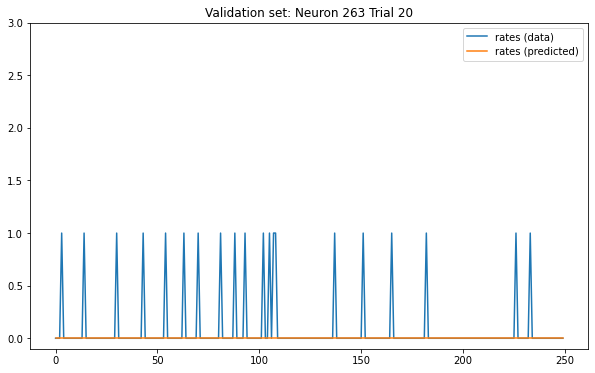

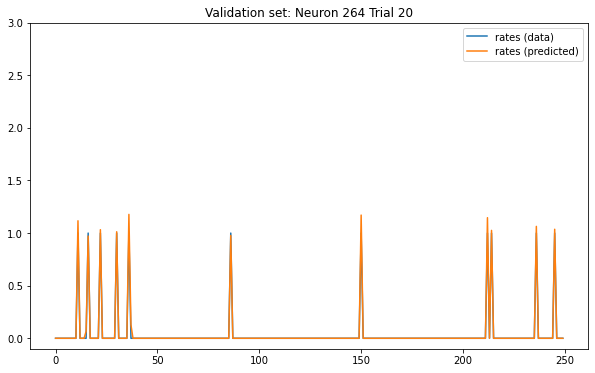

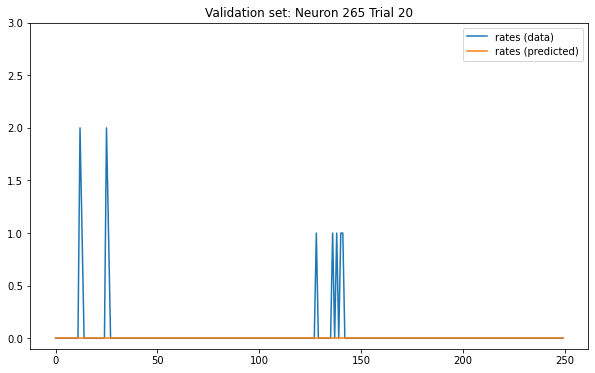

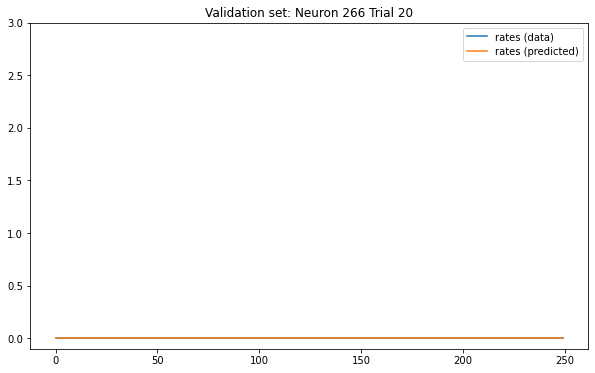

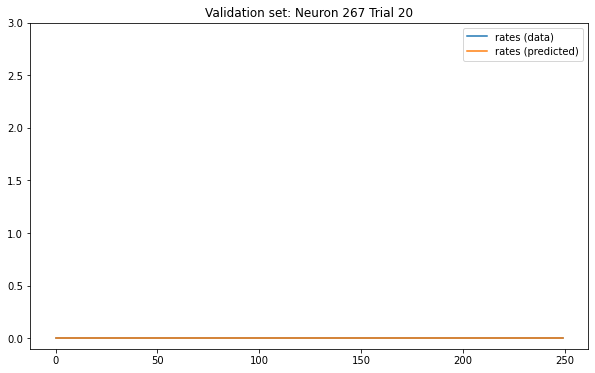

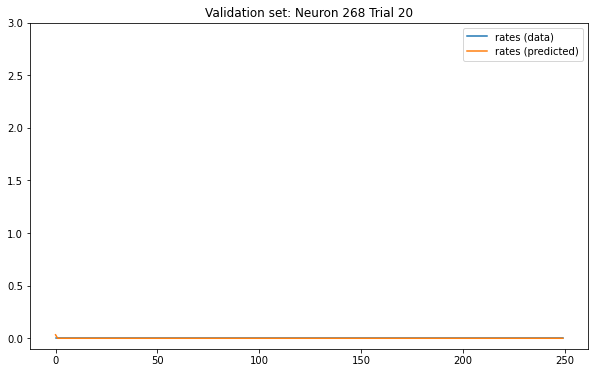

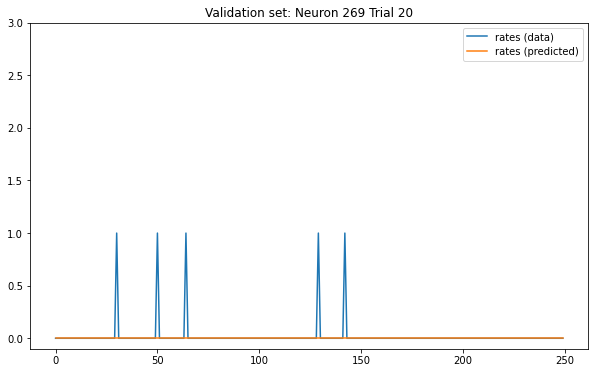

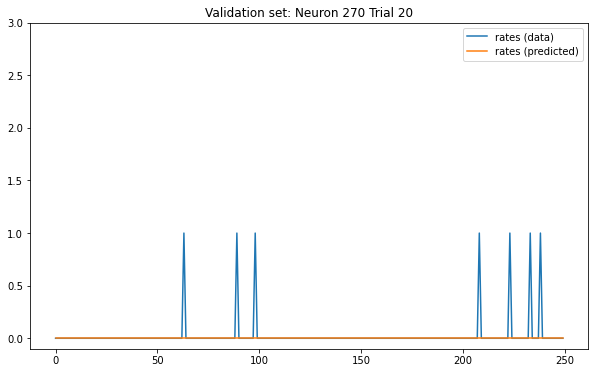

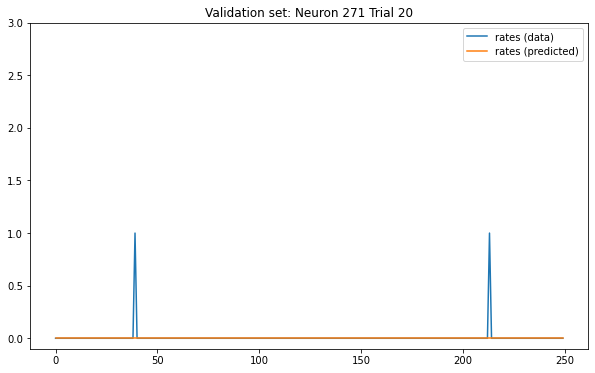

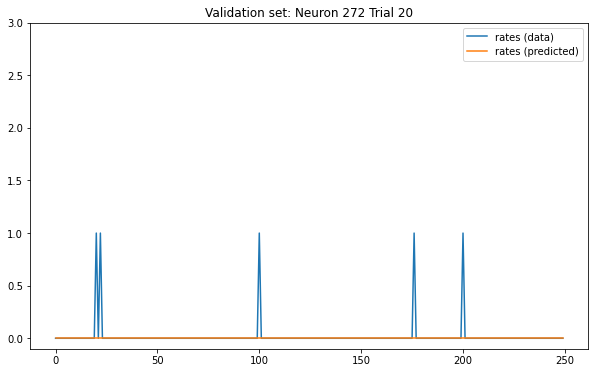

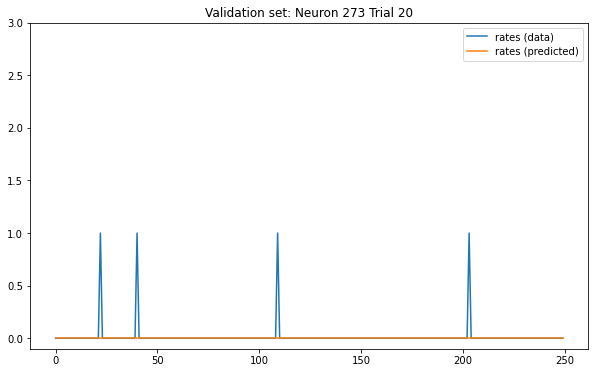

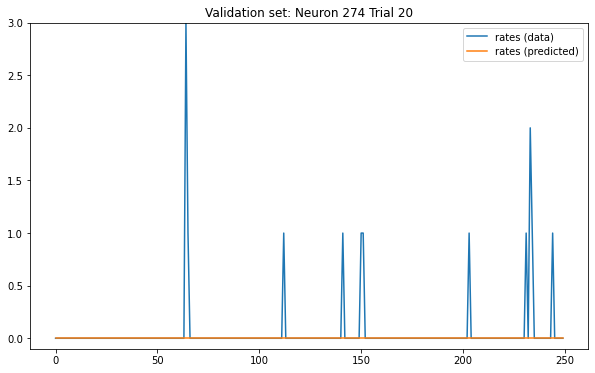

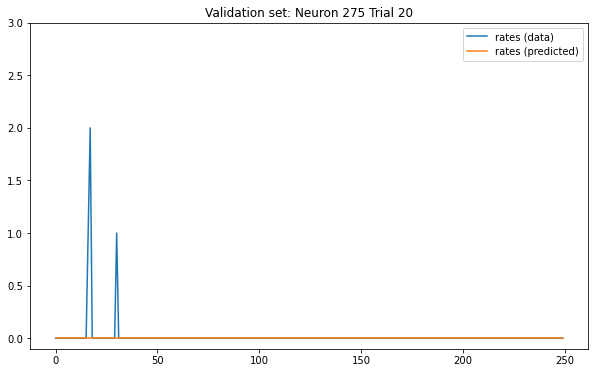

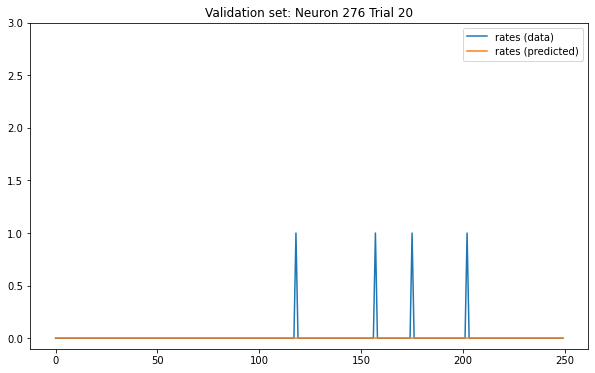

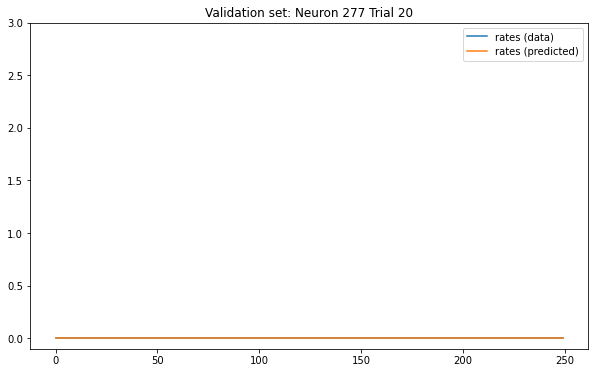

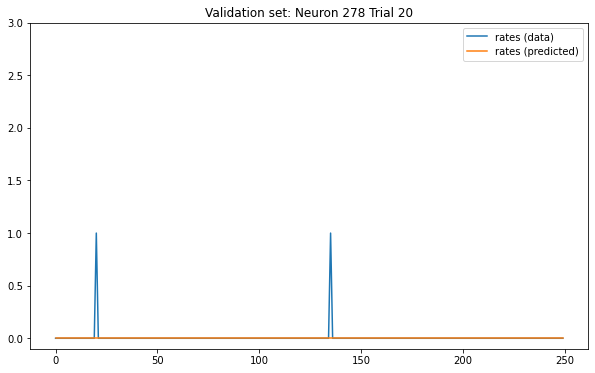

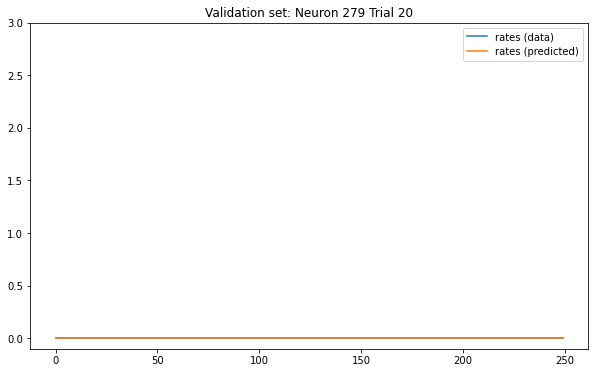

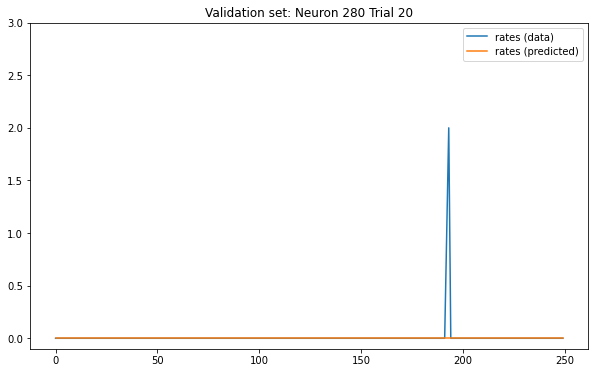

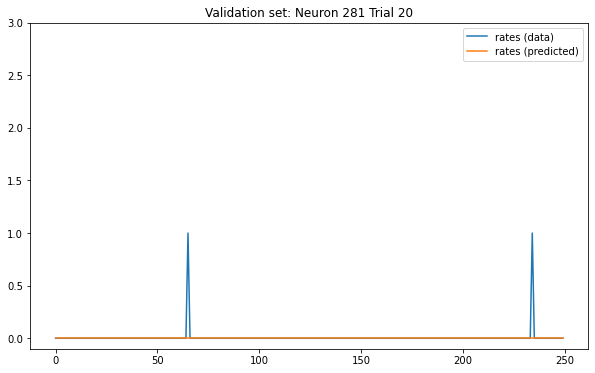

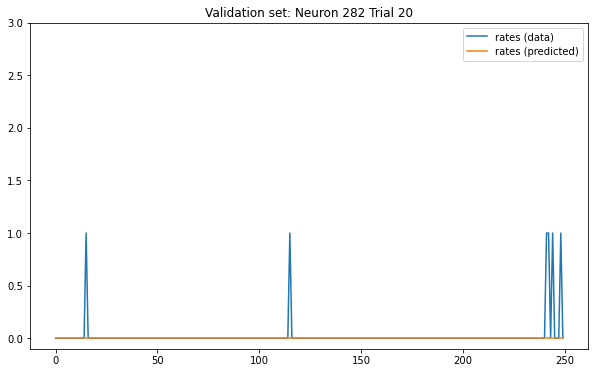

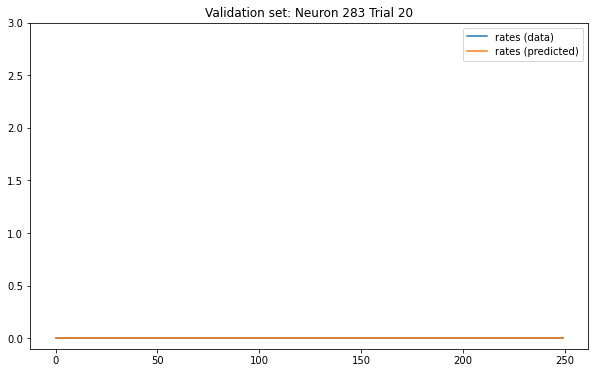

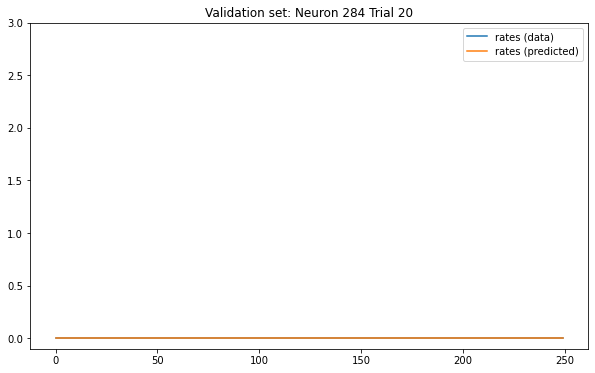

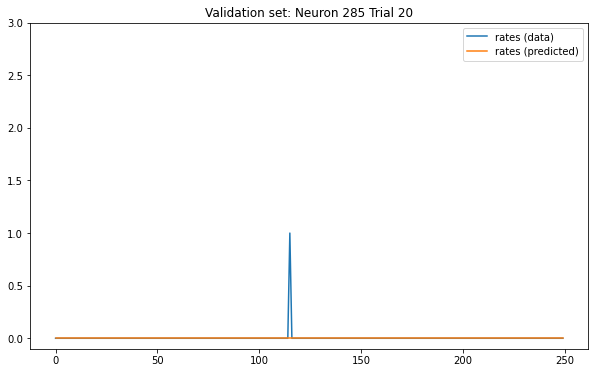

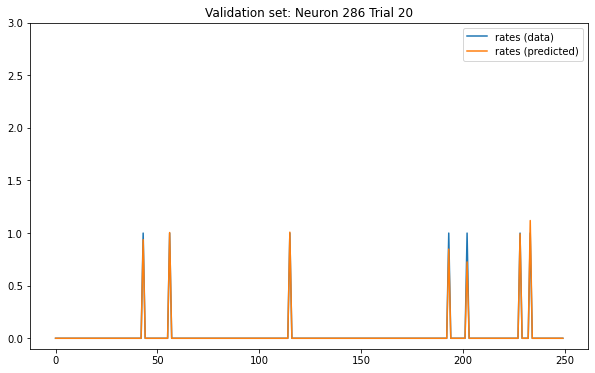

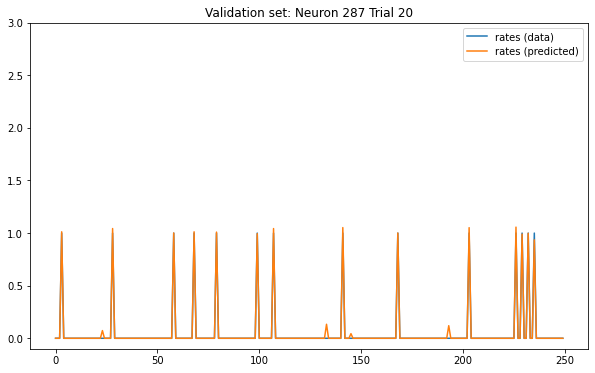

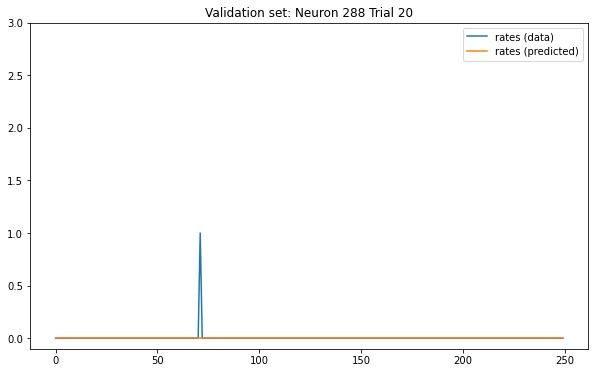

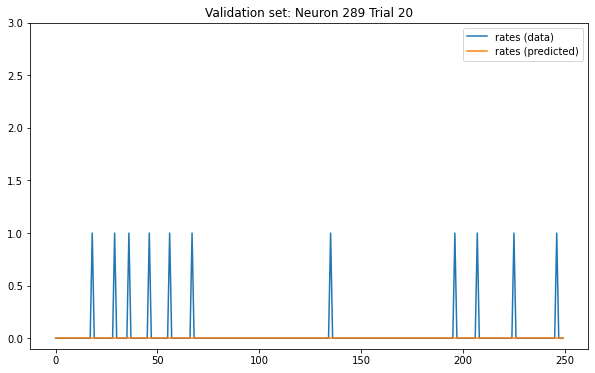

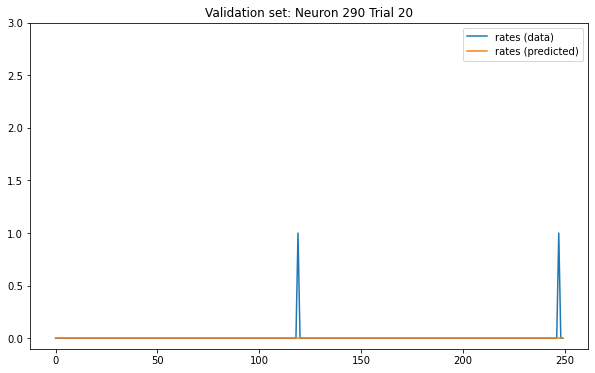

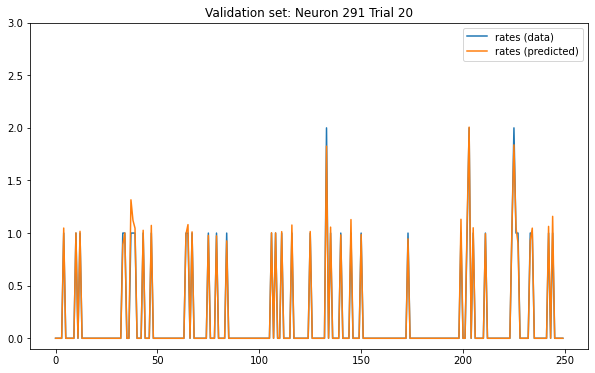

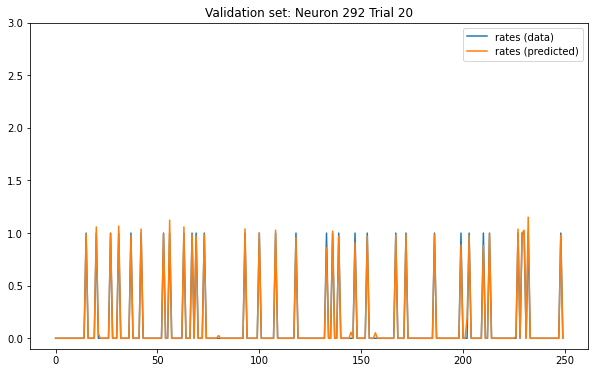

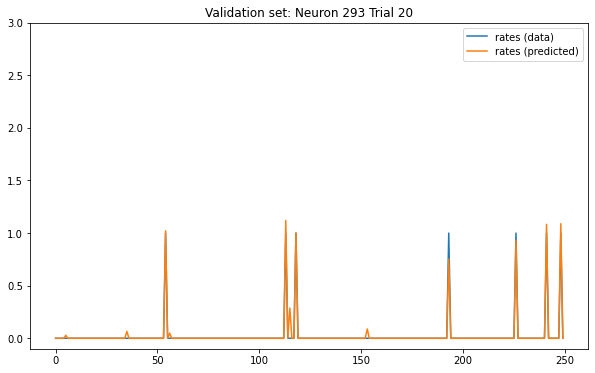

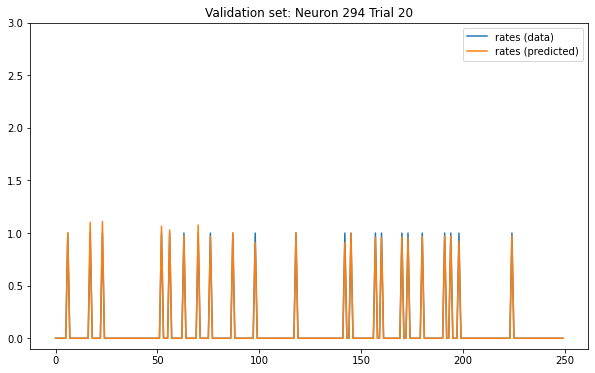

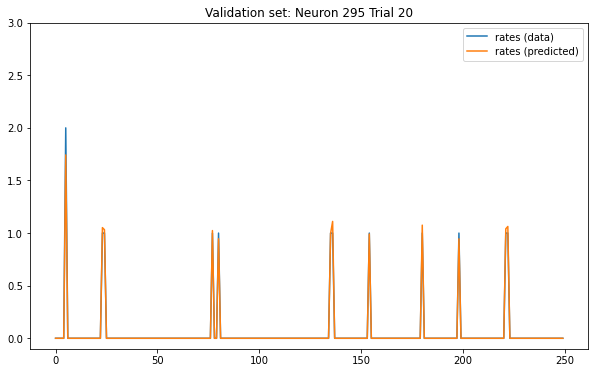

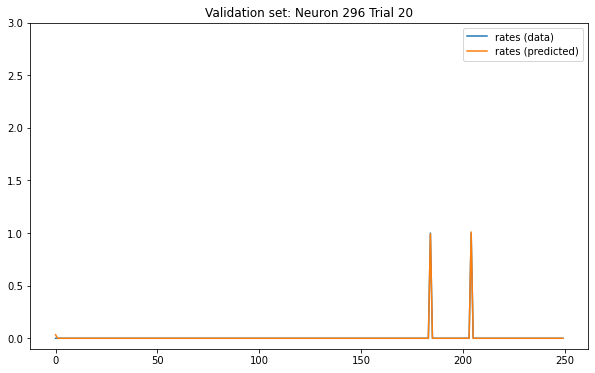

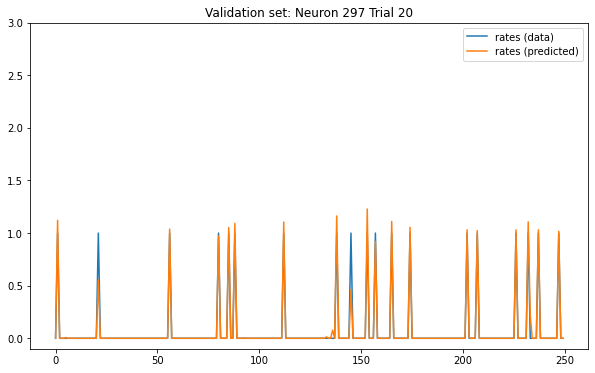

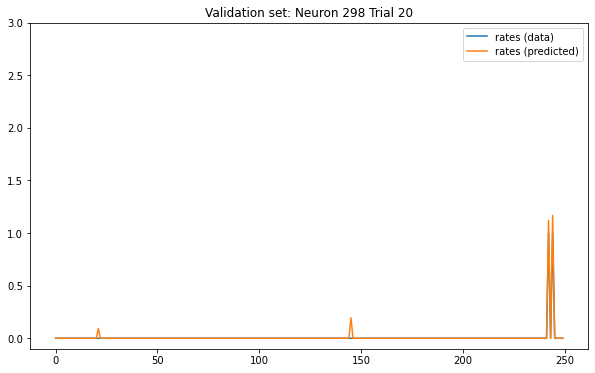

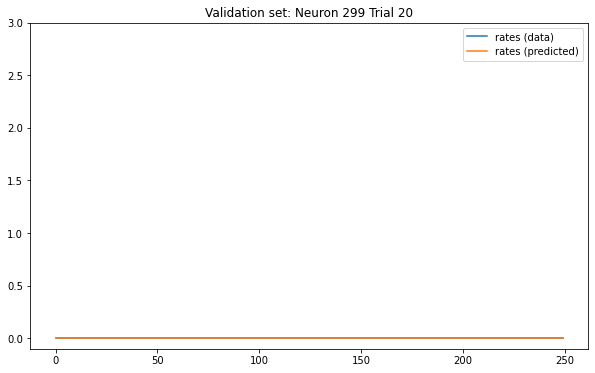

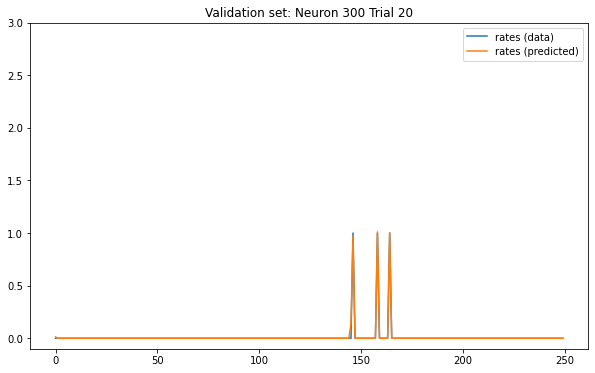

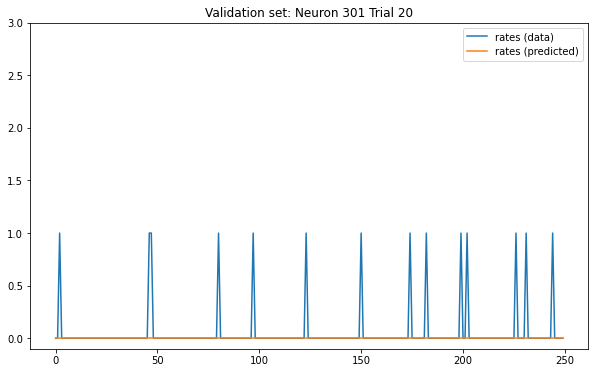

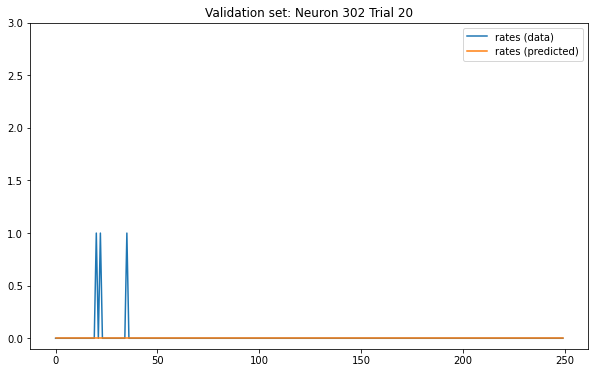

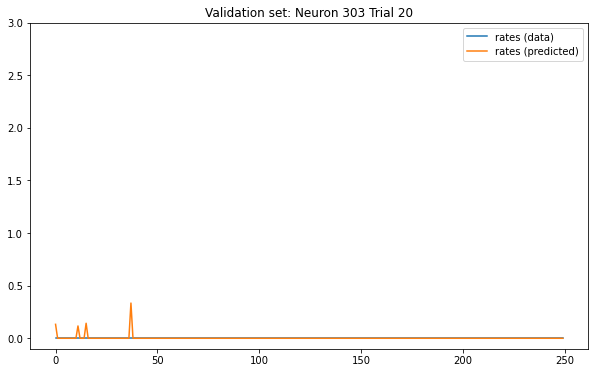

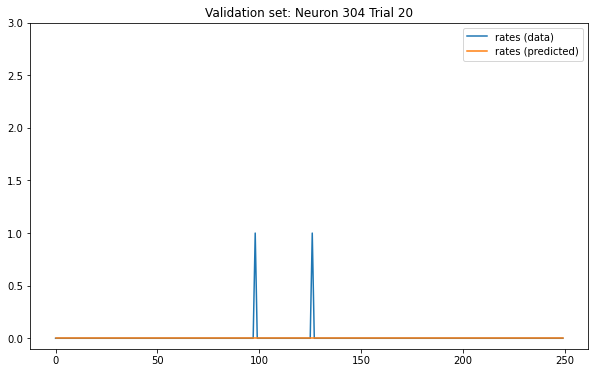

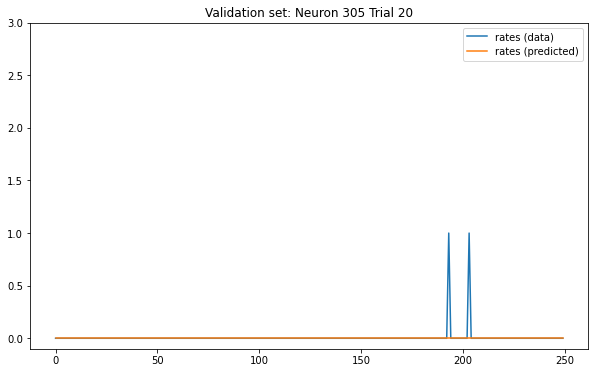

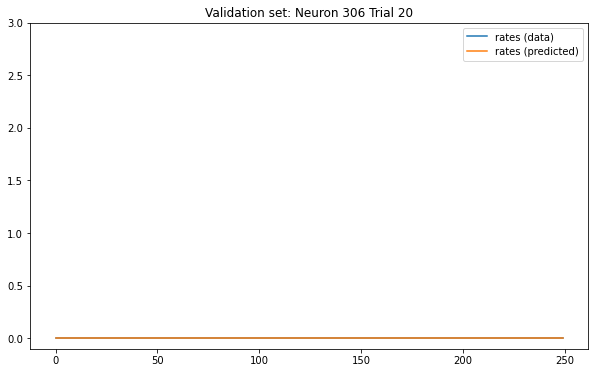

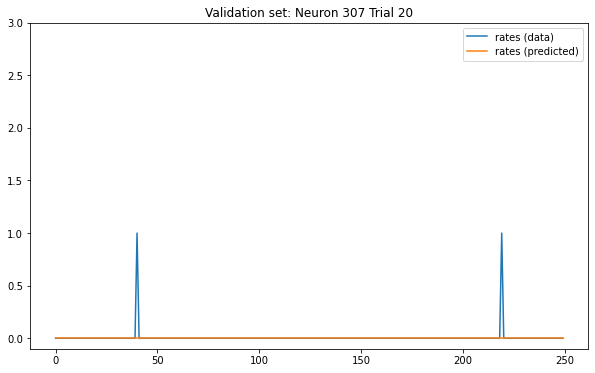

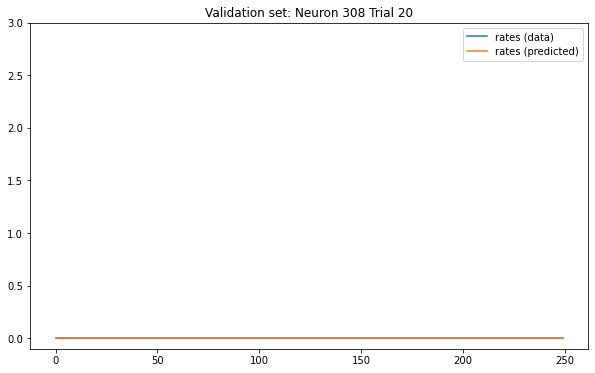

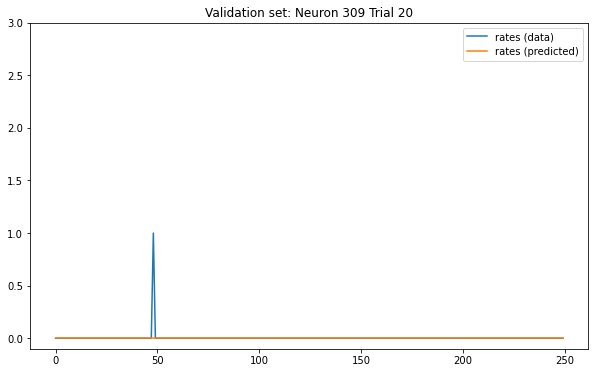

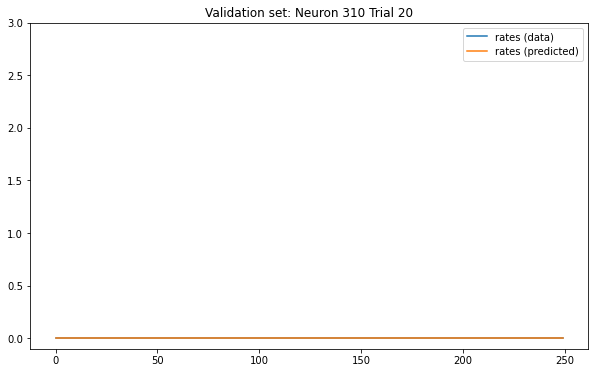

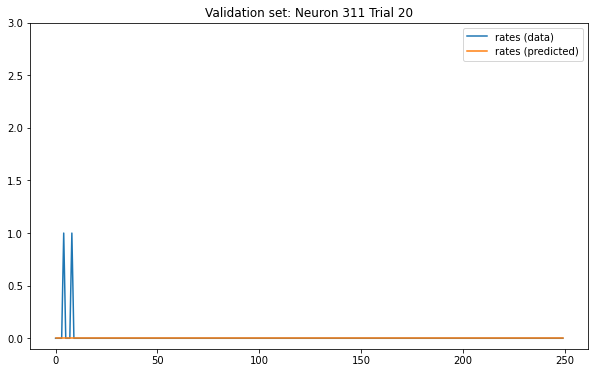

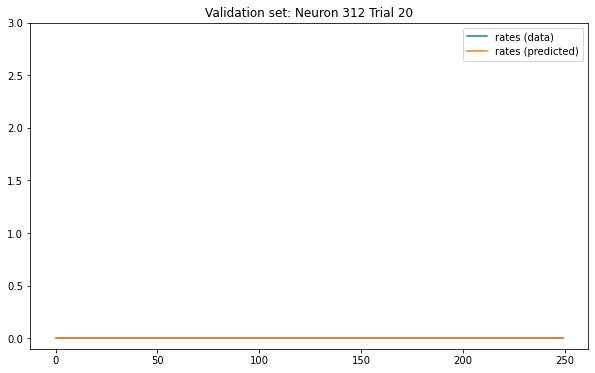

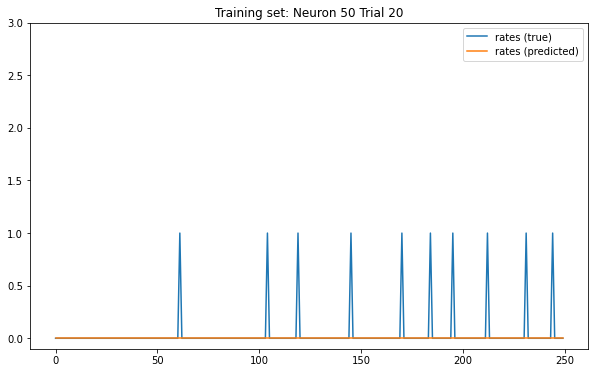

In [9]:
# visualize the performance of the rnn model
netinput=testData
prd=net(netinput)
rpred = prd.detach().cpu().numpy()
# nn = 30
ntrial = 20

for nn in range(testData.shape[-1]):
    # Plot for Test Data
    plt.figure(figsize=(10, 6))
    plt.plot(testData[:, ntrial, nn], label='rates (data)')
    plt.plot(rpred[:,ntrial, nn], label='rates (predicted)')
    plt.legend()
    plt.title(f'Validation set: Neuron {nn+200} Trial {ntrial}')
    plt.ylim((-0.1, 3))
    plt.show()

# Plot for Training Data
netinput=trainingData
prd=net(netinput)  
rpred = prd.detach().cpu().numpy()
nn = 50
ntrial = 20
plt.figure(figsize=(10, 6))
#plt.plot(fake_spk_rates[:,ntrial, nn], label='rates (true)')
plt.plot( trainingData[:, ntrial, nn], label='spikes')
plt.plot(rpred[:,ntrial, nn], label='rates (predicted)')

plt.legend(['rates (true)', 'rates (predicted)', 'spikes'])
plt.title(f'Training set: Neuron {nn} Trial {ntrial}')
plt.ylim((-0.1, 3))
plt.show()

In [10]:
## next: try the model with the real data

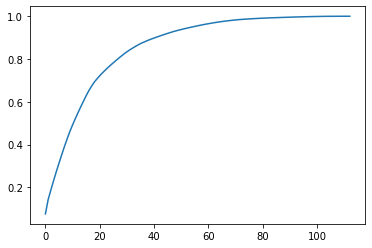

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(trainingData.reshape(-1, trainingData.shape[-1]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [13]:
np.concatenate([np.arange(trainingData.shape[-1]).reshape(-1,1), pca.explained_variance_ratio_.cumsum().reshape(-1,1)], -1)

array([[0.00000000e+00, 7.54669036e-02],
       [1.00000000e+00, 1.41863084e-01],
       [2.00000000e+00, 1.86945199e-01],
       [3.00000000e+00, 2.30713282e-01],
       [4.00000000e+00, 2.72796608e-01],
       [5.00000000e+00, 3.13034784e-01],
       [6.00000000e+00, 3.52252490e-01],
       [7.00000000e+00, 3.90944119e-01],
       [8.00000000e+00, 4.26562890e-01],
       [9.00000000e+00, 4.61236840e-01],
       [1.00000000e+01, 4.91744993e-01],
       [1.10000000e+01, 5.21114498e-01],
       [1.20000000e+01, 5.49114894e-01],
       [1.30000000e+01, 5.76418606e-01],
       [1.40000000e+01, 6.02689689e-01],
       [1.50000000e+01, 6.28426425e-01],
       [1.60000000e+01, 6.52604251e-01],
       [1.70000000e+01, 6.73140749e-01],
       [1.80000000e+01, 6.92289079e-01],
       [1.90000000e+01, 7.07285177e-01],
       [2.00000000e+01, 7.21819349e-01],
       [2.10000000e+01, 7.35200282e-01],
       [2.20000000e+01, 7.47822899e-01],
       [2.30000000e+01, 7.59850008e-01],
       [2.400000

In [22]:
testPCA = pca.transform(testData.reshape(-1, testData.shape[-1]))
testReconstructed = pca.inverse_transform(testPCA)[...,41].reshape(testData.size(0), testData.size(1), -1)

testReconstructed.shape


(250, 43, 1)

In [24]:
testData.shape

torch.Size([250, 43, 113])